In [7]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set plot params
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize

# Task 1 - Compute energy to volume relation

The lattice parameter that yields the lowest energy is: 4.031 Å.


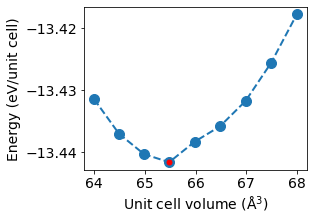

In [2]:
# Load data
data = np.loadtxt("datafiles/energy_to_volume.dat")

# Define figure
fig, ax = plt.subplots(figsize=(4,3))

# Plot
ax.plot(data[:,0], data[:,1], c='C0', linestyle='--', marker='o', linewidth=2, markersize=10)
ax.plot(data[3,0], data[3,1], marker='.', color='r', markersize=10)
ax.set_xlabel(r'Unit cell volume (Å$^3$)')
ax.set_ylabel('Energy (eV/unit cell)')
print(f'The lattice parameter that yields the lowest energy is: {np.cbrt(data[3,0]):.3f} Å.')

The theoretical (tabulated) value for the lattice parameter of Al (FCC) is $a \approx 4.04$ Å. T
This could be calculated by knowing the radius of the atoms and then doing some fancy geometry, however the radius would have to be measured experimentally and would thus be no more of a theoretical value than the tabulated value for $a$. 

# Task 2 - Velocity Verlet algorithm and temperature

We are to solve the velocity Verlet algorithm with uniformly random displacements and no initial velocities. The acceleration is calculated by alpotential.c. Thus, the only thing that we need to implement is the updates on the position and velocities, as well as saving them. 

Using atomic units (E = 1 eV, T = 1 ps, L = 1 Å) our mass unit is M=E/T$^2$L$^2$ = 1.602e-23 kg = 9649 u => 1 u = 1/9649 M. The mass of Al is 26.98 u => $m_{Al} = 0.002796 M.

Save the potential, kinetic and total energies.

The displacement should be +- 6.5\%.The transformation from $r_0 \in (0,1)$ is: $r = 2 (r_0 - 0.5) \cdot 0.065 a$

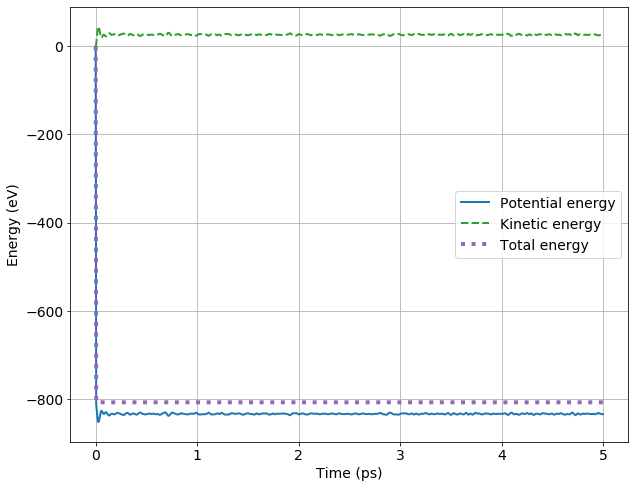

In [158]:
# Load energy data
data = np.loadtxt("datafiles/vv_energies.dat")

# Define figure
fig, ax = plt.subplots(figsize=(10,8))

# Plot
ax.plot(data[:,0], data[:,1], 'C0', linestyle='-', linewidth=2, label='Potential energy')
ax.plot(data[:,0], data[:,2], 'C2', linestyle='--', linewidth=2, label='Kinetic energy')
ax.plot(data[:,0], data[:,3], 'C4', linestyle=':', linewidth=4, label='Total energy')
ax.set_xlabel(r'Time (ps)')
ax.set_ylabel('Energy (eV)')
ax.grid()
ax.legend(loc='best')


**A $\Delta t \leq 0.01$ was found to work well, with $\Delta t<0.005$ striking a good balance.**  

The temperature is given by the equipartition theorem as $<E_k> = \frac{1}{2}N k_B T \rightarrow T = \frac{2<E_k>}{N k_B}$.

In our units, the Boltzmann constant is given as: 

$$k_B = 1.3806 × 10^{-23} \text{ J/K} , \hspace{10px} \rightarrow k_B = 8.617 × 10^{-5} \text{ eV/K}.  $$

From the graph above, we identify the equlibriation phase to have ended at around 0.5 ps.

In [157]:
# Load energy data
data = np.loadtxt("datafiles/vv_energies.dat")

# Constants
N = 256
kB = 8.617e-5

eq_iter = int(0.5/0.005)
print(f'Equlibration time is: {eq_iter*0.005} ps, with iteration number {eq_iter}.')


# Calculate average kinetic energy
avg_Ek = np.mean(data[eq_iter:,2])

print(f'The average temperature over all timesteps is: T={2*avg_Ek/(3*N*kB):.2f}')

Equlibration time is: 0.5 ps, with iteration number 100.
The average temperature over all timesteps is: T=792.85


# Task 5 - Mean squared displacement and transport coefficients

The self-diffusion coefficient can be calculated as: 

$$D_s = \lim_{t\rightarrow\infty} \frac{1}{6t} \Delta_{MSD}(t) $$.

We approximate this limit with the average of the last 100 timesteps of $\Delta_{MSD}(t)$ /////////// **Is this ok?** ///////////

The self-diffusion coefficient is Ds=0.16 Å^2/ps


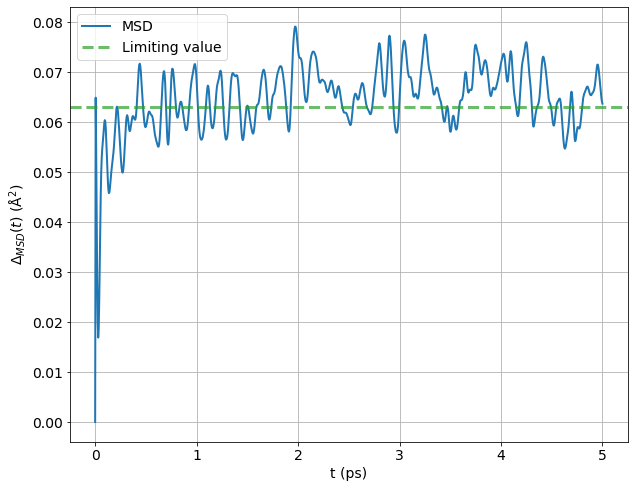

In [156]:
# Load energy data
data = np.loadtxt("datafiles/MSD.dat")

# Calculate the limiting value of Delta_MSD
lim = np.mean(data[-100:,1])
tlim = data[-1,1]  # Take the time as the last value

# Calculate the self-transport coefficient
Ds = lim/(6*tlim)

print(f'The self-diffusion coefficient is Ds={Ds:.2f} Å^2/ps')

# Define figure
fig, ax = plt.subplots(figsize=(10,8))

# Plot
ax.plot(data[:,0], data[:,1], 'C0', linestyle='-', linewidth=2, label='MSD')
ax.axhline(lim, c='C2', linestyle='--', linewidth=3, alpha=0.7, label='Limiting value')
ax.set_xlabel(r't (ps)')
ax.set_ylabel(r'$\Delta_{MSD}(t)$ (Å$^2$)')
ax.grid()
ax.legend(loc='best')